# Housing Price Prediction

## Importing the relevant libraries

In [1]:
# For this Housing example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
# Load the data 
raw_data = pd.read_csv('USA_Housing.csv')

# We will explore the top 5 rows of the df
raw_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
raw_data.describe(include = 'all')
# Categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,5000
top,NaN,NaN,NaN,NaN,NaN,NaN,"1388 Logan Ports\nNorth Johnstad, SD 46743"
freq,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06,NaN
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05,NaN
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,NaN
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05,NaN
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06,NaN
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06,NaN


### Determining the variables of interest

In [4]:
# We will create the regression without 'Address'
data = raw_data.drop(['Address'],axis=1)

# Let's check the descriptives without 'Address'
data.describe(include = 'all')

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Checking missing values

In [5]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise

data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

### Exploring the PDFs

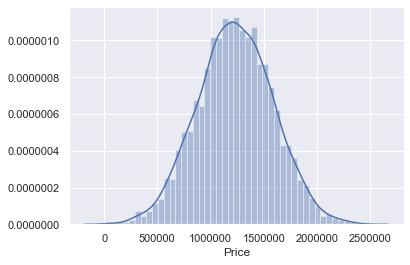

In [6]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data['Price'])

### Exploring the Linearity

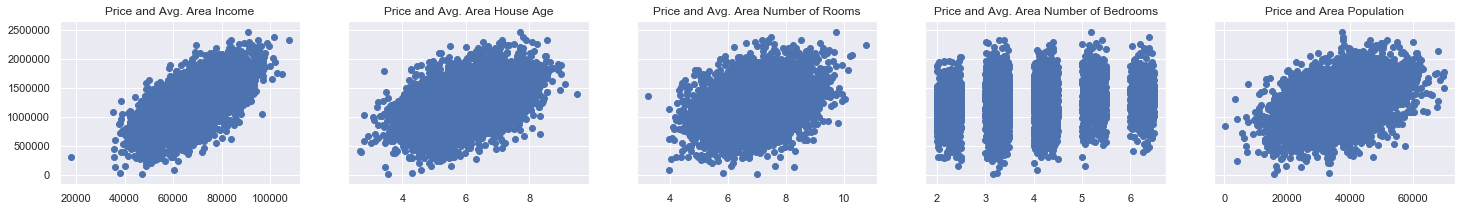

In [7]:
# Here we decided to use some matplotlib code, without explaining it Linearity\
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize =(25,3)) #sharey -> share 'Price' as y
ax1.scatter(data['Avg. Area Income'],data['Price'])
ax1.set_title('Price and Avg. Area Income')
ax2.scatter(data['Avg. Area House Age'],data['Price'])
ax2.set_title('Price and Avg. Area House Age')
ax3.scatter(data['Avg. Area Number of Rooms'],data['Price'])
ax3.set_title('Price and Avg. Area Number of Rooms')
ax4.scatter(data['Avg. Area Number of Bedrooms'],data['Price'])
ax4.set_title('Price and Avg. Area Number of Bedrooms')
ax5.scatter(data['Area Population'],data['Price'])
ax5.set_title('Price and Area Population')


plt.show()

## Linear regression model

### Declare the inputs and the targets

In [8]:
# The target(s) (dependent variable) is 'price'
targets = data['Price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data.drop(['Price'],axis=1)

### Scale the data

In [9]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split



In [11]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [12]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Let's check the outputs of the regression
# I'll store them in y_hat 
y_hat = reg.predict(x_train)

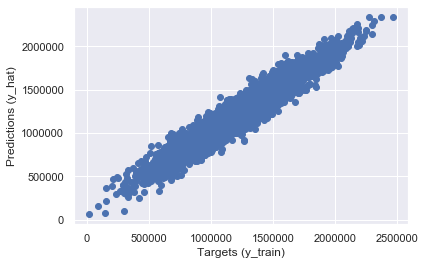

In [14]:
# compare the targets (y_train) and the predictions (y_hat) on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)')
# We want the x-axis and the y-axis to be the same
plt.xlim()
plt.ylim()
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

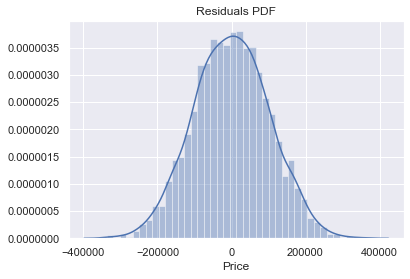

In [15]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF")

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are not many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)

In [16]:
# Find the R-squared of the model
reg.score(x_train,y_train)


0.9181859079129733

### Finding the weights and bias

In [17]:
# Obtain the bias (intercept) of the regression
reg.intercept_

1232374.526139742

In [18]:
# Obtain the weights (coefficients) of the regression
reg.coef_

array([230342.10551988, 164805.29545772, 120130.82515573,   2723.03223192,
       151552.41007222])

In [19]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Avg. Area Income,230342.105520
1,Avg. Area House Age,164805.295458
2,Avg. Area Number of Rooms,120130.825156
3,Avg. Area Number of Bedrooms,2723.032232
4,Area Population,151552.410072


## Testing

In [20]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

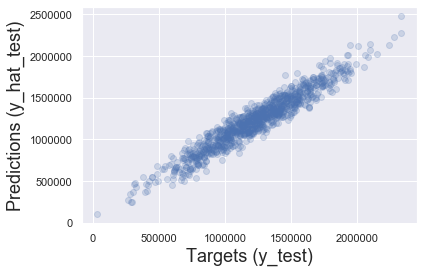

In [21]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim()
plt.ylim()
plt.show()

In [22]:
# Finally, let's manually check these predictions
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,4.489357e+05
1,1.165932e+06
2,9.518876e+05
3,4.538730e+05
4,1.267293e+06


In [23]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = y_test
df_pf

# we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data indexing

,Prediction,Target
0,4.489357e+05,NaN
1,1.165932e+06,1.505891e+06
2,9.518876e+05,NaN
3,4.538730e+05,NaN
4,1.267293e+06,NaN
...,...,...
995,1.467937e+06,1.898669e+06
996,1.500902e+06,NaN
997,1.294699e+06,1.367641e+06
998,1.307681e+06,1.788285e+06


In [24]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved 

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    5.995040e+05
1    1.161233e+06
2    7.940759e+05
3    4.145712e+05
4    1.216307e+06
Name: Price, dtype: float64

In [25]:
# Let's overwrite the 'Target' column with the appropriate values
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,4.489357e+05,5.995040e+05
1,1.165932e+06,1.161233e+06
2,9.518876e+05,7.940759e+05
3,4.538730e+05,4.145712e+05
4,1.267293e+06,1.216307e+06
...,...,...
995,1.467937e+06,1.309397e+06
996,1.500902e+06,1.557794e+06
997,1.294699e+06,1.266210e+06
998,1.307681e+06,1.223101e+06


In [26]:
# Additionally, we can calculate the difference between the targets and the predictions
# this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']


In [27]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,4.489357e+05,5.995040e+05,150568.316567,25.115481
1,1.165932e+06,1.161233e+06,-4699.545094,0.404703
2,9.518876e+05,7.940759e+05,-157811.759426,19.873638
3,4.538730e+05,4.145712e+05,-39301.785050,9.480104
4,1.267293e+06,1.216307e+06,-50985.790301,4.191852
...,...,...,...,...
995,1.467937e+06,1.309397e+06,-158539.731917,12.107842
996,1.500902e+06,1.557794e+06,56892.042157,3.652090
997,1.294699e+06,1.266210e+06,-28489.168881,2.249957
998,1.307681e+06,1.223101e+06,-84580.611535,6.915262


In [28]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,1.227105e+06,1.225596e+06,-1509.359987,7.474780
std,3.332460e+05,3.450736e+05,99279.941322,9.557787
min,1.036006e+05,3.114052e+04,-318855.632592,0.010493
25%,1.017188e+06,9.961284e+05,-73293.466123,2.757967
50%,1.231451e+06,1.225827e+06,-64.842674,5.782465
75%,1.442546e+06,1.450287e+06,69749.509331,10.029568
max,2.475342e+06,2.332111e+06,273870.406074,232.687373


In [29]:
# lit is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
691,1281243.72,1281378.17,134.46,0.01
219,886585.17,886321.02,-264.14,0.03
557,1487050.36,1487729.59,679.24,0.05
355,1354304.62,1355022.28,717.66,0.05
266,1221532.74,1220700.70,-832.04,0.07
...,...,...,...,...
842,684085.46,482689.70,-201395.76,41.72
593,546773.62,378466.42,-168307.20,44.47
914,461528.67,311111.20,-150417.47,48.35
441,474930.40,319495.67,-155434.73,48.65
